In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os, cv2

### to change according to your machine
base_dir = os.path.expanduser("/home/data/lcz")
path_validation = os.path.join(base_dir, 'training.h5')
#path_validation = os.path.join(base_dir, 'validation.h5')
fid_validation = h5py.File(path_validation,'r')

## we can have a look at which keys are stored in the file
## you will get the return [u'label', u'sen1', u'sen2']
## sen1 and sen2 means the satellite images
print (fid_validation.keys())
print ("-" * 60)
print ("validation part")
s1_validation = fid_validation['sen1']
print (s1_validation.shape)
s2_validation = fid_validation['sen2']
print (s2_validation.shape)
label_validation = fid_validation['label']
print (label_validation.shape)

KeysView(<HDF5 file "training.h5" (mode r)>)
------------------------------------------------------------
validation part
(352366, 32, 32, 8)
(352366, 32, 32, 10)
(352366, 17)


[ 5068. 24431. 31693.  8651. 16493. 35290.  3269. 39326. 13584. 11954.
 42902.  9514.  9165. 41377.  2392.  7898. 49359.]


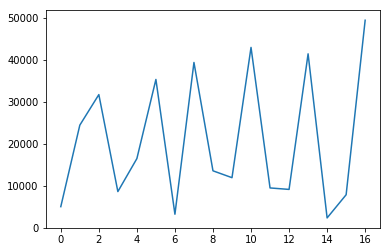

In [2]:
## compute the quantity for each col
# visualization, plot the first pair of Sentinel-1 and Sentinel-2 patches of training.h5
import matplotlib.pyplot as plt
label_qty = np.sum(label_validation, axis=0)
print(label_qty)
plt.plot(label_qty)

In [3]:
s1=[]
s2=[]
for i in range(17):
    idx=np.where(label_validation[:,i])[0][:202]
    s1.append(s1_validation[list(idx)])
    s2.append(s2_validation[list(idx)])
s1=np.concatenate(s1)
s2=np.concatenate(s2)
print(s1.shape,s2.shape)

(3434, 32, 32, 8) (3434, 32, 32, 10)


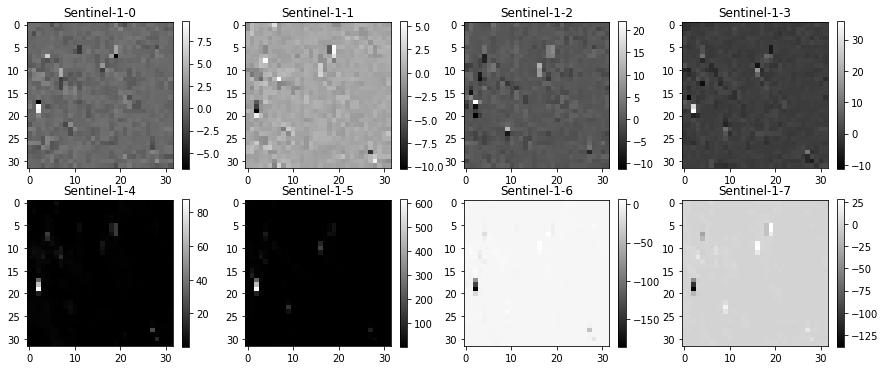

In [4]:
plt.subplots(figsize=(15, 6))

for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(s1[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

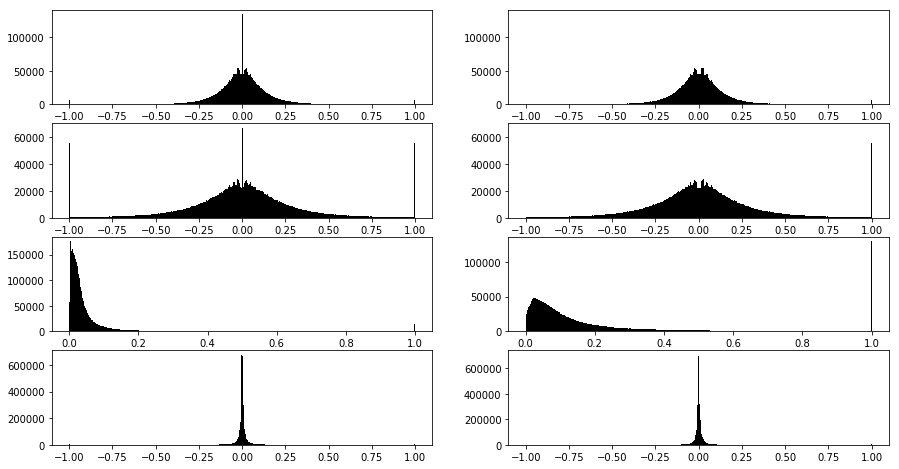

In [4]:
s1_=np.where(s1>1,1,s1)
s1_=np.where(s1_<-1,-1,s1_)
plt.subplots(figsize=(15,8))
for i in range(8):
    plt.subplot(4,2,i+1)
    s1_n=s1_[:,:,:,i].reshape([-1])
    plt.hist(s1_n, bins=500, color='k')
plt.show()

-3.874787144053577 2.9330246169610192
-3.218717619987247 4.103876716154339


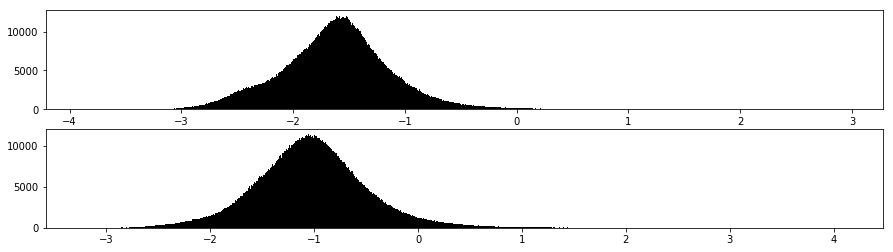

In [5]:
s1_=np.zeros([3434,32,32,2])
s1_[:,:,:,0]=np.log10(s1[:,:,:,4])
s1_[:,:,:,1]=np.log10(s1[:,:,:,5])
plt.subplots(figsize=(15,4))
for i in range(2):
    plt.subplot(2,1,i+1)
    s1_n=s1_[:,:,:,i].reshape([-1])
    print(np.min(s1_n),np.max(s1_n))
    plt.hist(s1_n, bins=2000, color='k')
plt.show()

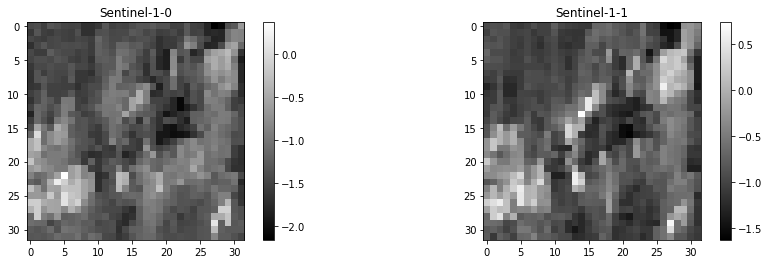

In [6]:
plt.subplots(figsize=(15, 4))

for i in range(2):
  plt.subplot(1,2,i+1)
  plt.imshow(s1_[1,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

0.0 1.0
0.0 1.0


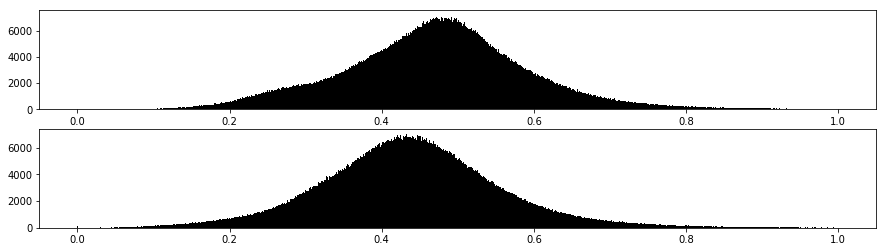

In [7]:
s1_band=np.zeros_like(s1_)
s1_band[:,:,:,0]=np.where(s1_[:,:,:,0]>0.5,0.5,s1_[:,:,:,0])
s1_band[:,:,:,0]=(np.where(s1_band[:,:,:,0]<-3.5,-3.5,s1_band[:,:,:,0])+3.5)/4
s1_band[:,:,:,1]=np.where(s1_[:,:,:,1]>1.5,1.5,s1_[:,:,:,1])
s1_band[:,:,:,1]=(np.where(s1_band[:,:,:,1]<-3,-3,s1_band[:,:,:,1])+3)/4.5
plt.subplots(figsize=(15,4))
for i in range(2):
    plt.subplot(2,1,i+1)
    s1_n=s1_band[:,:,:,i].reshape([-1])
    print(np.min(s1_n),np.max(s1_n))
    plt.hist(s1_n, bins=2000, color='k')
plt.show()

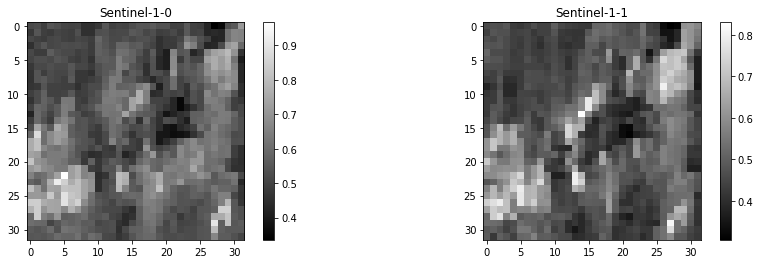

In [8]:
plt.subplots(figsize=(15,4))

for i in range(2):
  plt.subplot(1,2,i+1)
  plt.imshow(s1_band[1,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

## s2

0.0001 1.9543
0.0001 2.2927
0.0001 2.699
0.0001 1.1145
0.0001 1.2415
0.0001 1.2765
0.0001 2.8
0.0001 1.2614
0.0004 2.5615
0.0001 1.7737


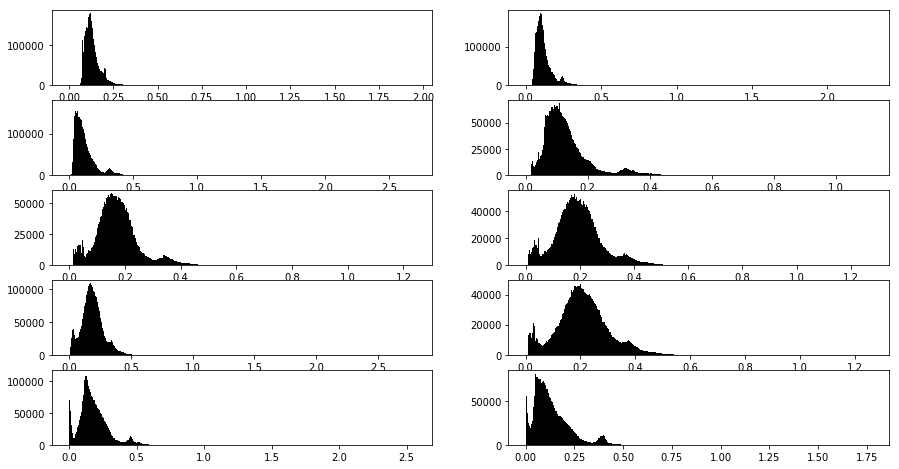

In [9]:
plt.subplots(figsize=(15,8))
for i in range(10):
    plt.subplot(5,2,i+1)
    s2_n=s2[:,:,:,i].reshape([-1])
    print(np.min(s2_n),np.max(s2_n))
    plt.hist(s2_n, bins=500, color='k')
plt.show()

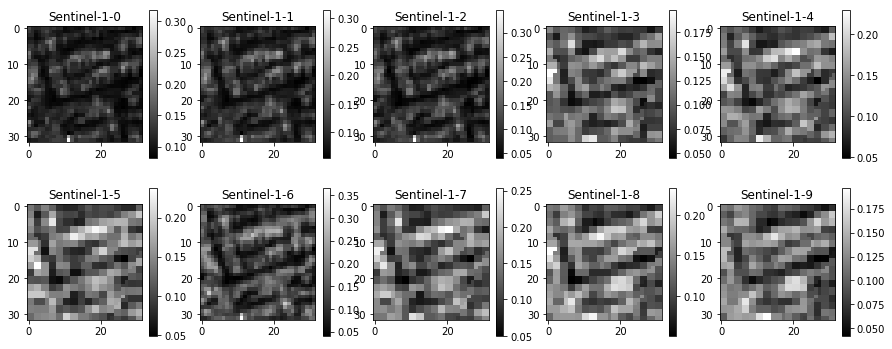

In [10]:
plt.subplots(figsize=(15, 6))

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(s2[8,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

-1.3001622741327543 0.30196272647336303
-1.3001622741327543 0.3697166775485606
-1.3001622741327543 0.4391747398434684
-1.1542819820333412 0.45788189673399227


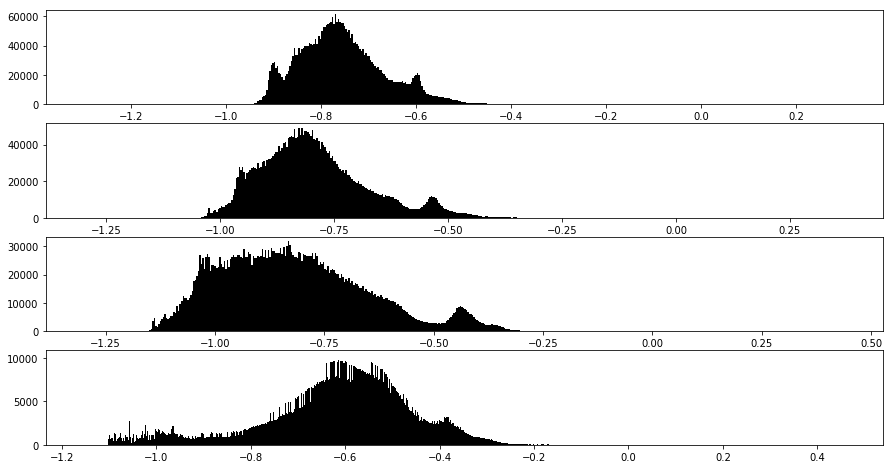

In [19]:
s2_=np.concatenate([s2[:,:,:,0:3],np.expand_dims(s2[:,:,:,6],-1)], -1)
plt.subplots(figsize=(15,8))
for i in range(3):
    plt.subplot(4,1,i+1)
    s2_[:,:,:,i]=np.log10(s2_[:,:,:,i]+0.05)
    s2_n=s2_[:,:,:,i].reshape([-1])
    print(np.min(s2_n),np.max(s2_n))
    plt.hist(s2_n, bins=500, color='k')
plt.subplot(4,1,4)
s2_[:,:,:,3]=np.log10(s2_[:,:,:,3]+0.07)
s2_n=s2_[:,:,:,3].reshape([-1])
print(np.min(s2_n),np.max(s2_n))
plt.hist(s2_n, bins=2000, color='k')
plt.show()

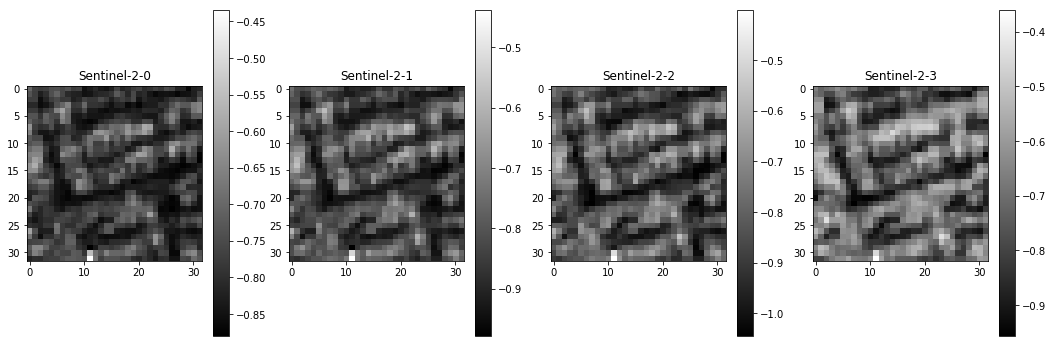

In [20]:
plt.subplots(figsize=(18, 6))

for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(s2_[8,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-2-%d'%(i))
plt.show()

0.0 1.0
0.0 1.0
0.0 0.9999999999999999
0.0 0.9999999999999999


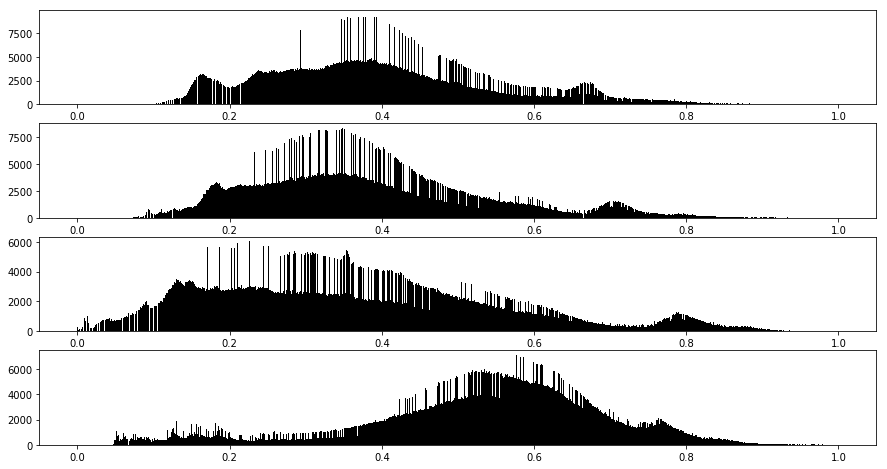

In [35]:
s2_band=np.zeros_like(s2_)
s2_band[:,:,:,0]=np.where(s2_[:,:,:,0]>-0.4,-0.4,s2_[:,:,:,0])
s2_band[:,:,:,0]=(np.where(s2_band[:,:,:,0]<-1.0,-1.0,s2_band[:,:,:,0])+1.0)/0.6
s2_band[:,:,:,1]=np.where(s2_[:,:,:,1]>-0.3,-0.3,s2_[:,:,:,1])
s2_band[:,:,:,1]=(np.where(s2_band[:,:,:,1]<-1.1,-1.1,s2_band[:,:,:,1])+1.1)/0.8
s2_band[:,:,:,2]=np.where(s2_[:,:,:,2]>-0.25,-0.25,s2_[:,:,:,2])
s2_band[:,:,:,2]=(np.where(s2_band[:,:,:,2]<-1.15,-1.15,s2_band[:,:,:,2])+1.15)/0.9
s2_band[:,:,:,3]=np.where(s2_[:,:,:,3]>-0.15,-0.15,s2_[:,:,:,3])
s2_band[:,:,:,3]=(np.where(s2_band[:,:,:,3]<-1.15,-1.15,s2_band[:,:,:,3])+1.15)/1.0
plt.subplots(figsize=(15,8))
for i in range(4):
    plt.subplot(4,1,i+1)
    s2_n=s2_band[:,:,:,i].reshape([-1])
    print(np.min(s2_n),np.max(s2_n))
    plt.hist(s2_n, bins=2000, color='k')
plt.show()

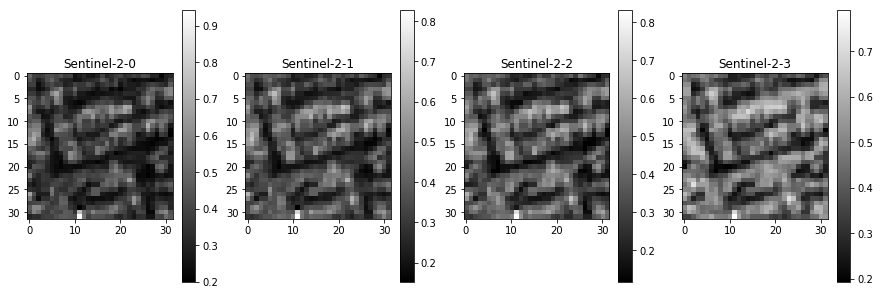

In [36]:
plt.subplots(figsize=(15, 5))

for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(s2_band[8,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-2-%d'%(i))
plt.show()

-1.0 1.0
-1.0 1.0
-1.0 0.9999999999999998
-1.0 0.9999999999999998


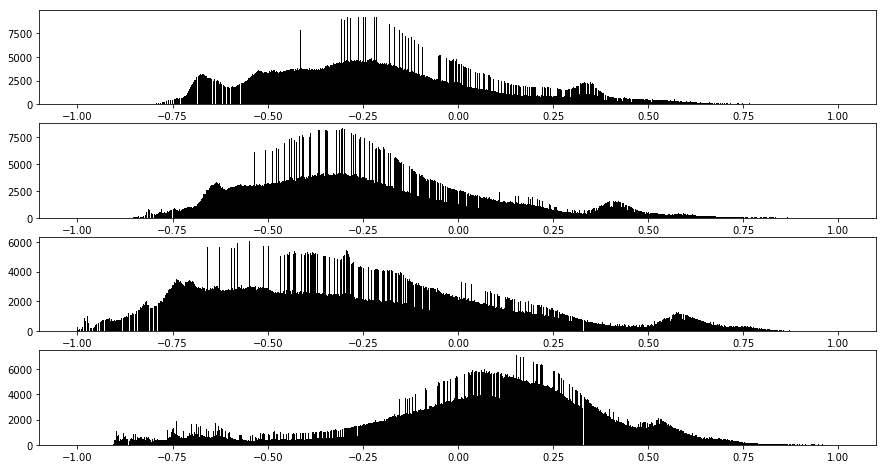

In [37]:
s2_end=np.zeros_like(s2_)
plt.subplots(figsize=(15,8))
for i in range(4):
    plt.subplot(4,1,i+1)
    s2_end[:,:,:,i]=(s2_band[:,:,:,i]-0.5)*2
    s2_n=s2_end[:,:,:,i].reshape([-1])
    print(np.min(s2_n),np.max(s2_n))
    plt.hist(s2_n, bins=2000, color='k')
plt.show()

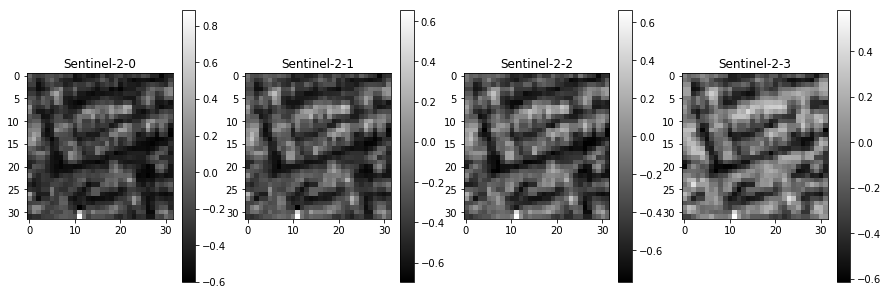

In [38]:
plt.subplots(figsize=(15, 5))

for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(s2_end[8,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-2-%d'%(i))
plt.show()